## Machine learning model using Tensorflow estimator API to accurately predict whether or not the patients in the dataset have diabetes or not 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')

# Information on Columns:

Pregnancies - Number of times pregnant
GlucosePlasma - glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure - Diastolic blood pressure (mm Hg)
SkinThickness - Triceps skin fold thickness (mm)
Insulin - 2-Hour serum insulin (mu U/ml)
BMI - Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction - Diabetes pedigree function
Age - Age (years)
Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
columns_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction','Age']

In [7]:
# Normalize data in all the columns except Age and Outcome
diabetes_df[columns_norm] = diabetes_df[columns_norm].apply(lambda x: (x - x.min())/(x.max() - x.min()))

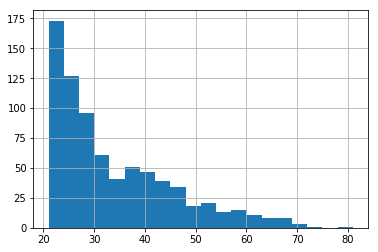

In [11]:
# Histogram Plot - Age
diabetes_df['Age'].hist(bins = 20)

In [16]:
#Create features columns
Pregnancies = tf.feature_column.numeric_column(columns_norm[0])
Glucose = tf.feature_column.numeric_column(columns_norm[1])
BloodPressure = tf.feature_column.numeric_column(columns_norm[2])
SkinThickness = tf.feature_column.numeric_column(columns_norm[3])
Insulin = tf.feature_column.numeric_column(columns_norm[4])
BMI = tf.feature_column.numeric_column(columns_norm[5])
DiabetesPedigreeFunction = tf.feature_column.numeric_column(columns_norm[6])
Age = tf.feature_column.numeric_column(columns_norm[7])

# Create buckets for age based on age histogram
Age_buckets = tf.feature_column.bucketized_column(source_column = Age, boundaries = [20,30,40,50,60,70,80])

In [17]:
features = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age_buckets]

In [23]:
# Training and testing data
x_data = diabetes_df.drop('Outcome', axis = 1)
y_data = diabetes_df['Outcome']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [24]:
# Input function to train the model
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size = 8, num_epochs = 1000, shuffle = True)

# Linear Classifier

In [25]:
# Linear Classifier
model = tf.estimator.LinearClassifier(feature_columns = features, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmp3zgjxokd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a29f9bc50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [26]:
# Training model
model.train(input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmp3zgjxokd/model.ckpt.
INFO:tensorflow:loss = 5.5451775, step = 1
INFO:tensorflow:global_step/sec: 408.947
INFO:tensorflow:loss = 6.686342, step = 101 (0.246 sec)
INFO:tensorflow:global_step/sec: 628.184
INFO:tensorflow:loss = 4.9082766, step = 201 (0.158 sec)
INFO:tensorflow:global_step/sec: 651.662
INFO:tensorflow:loss = 5.759714, step = 301 (0.152 sec)
INFO:tensorflow:global_step/sec: 745.394
INFO:tensorflow:loss = 5.513869, step = 401 (0.135 sec)
INFO:tensorflow:global_step/sec: 704.777
INFO:tensorflow:loss = 6.184618, step = 501 (0.141 sec)
INFO:tensorflow:global_step/sec: 700.574
INFO:tensorflow:loss = 2.3628058, step = 601 (0.145 sec)
INFO:tensorflow:g

In [28]:
# Evaluation function to test the model
eval_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y = y_test, batch_size = 8, num_epochs = 1, shuffle = False)

In [31]:
# Testing model
results_linearClassifier = model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-10T14:41:35Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmp3zgjxokd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-10-14:41:36
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.7077922, auc = 0.7740062, auc_precision_recall = 0.59847146, average_loss = 0.5204475, global_step = 1000, label/mean = 0.29220778, loss = 4.0074453, precision = 0.5675676, prediction/mean = 0.3547598, recall = 0.46666667
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmp3zgjxokd/model.ckpt-1000


In [32]:
# Testing results
results_linearClassifier

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.7077922,
 'auc': 0.7740062,
 'auc_precision_recall': 0.59847146,
 'average_loss': 0.5204475,
 'label/mean': 0.29220778,
 'loss': 4.0074453,
 'precision': 0.5675676,
 'prediction/mean': 0.3547598,
 'recall': 0.46666667,
 'global_step': 1000}

# DNN Classifier

In [47]:
# DNN Classifier
model_dnn = tf.estimator.DNNClassifier(hidden_units = [10,10,10], feature_columns = features, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmpd9jcdsle', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2acde710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
# Training model
model_dnn.train(input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmpd9jcdsle/model.ckpt.
INFO:tensorflow:loss = 5.5459204, step = 1
INFO:tensorflow:global_step/sec: 465.372
INFO:tensorflow:loss = 7.224908, step = 101 (0.217 sec)
INFO:tensorflow:global_step/sec: 693.053
INFO:tensorflow:loss = 3.1251526, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 708.271
INFO:tensorflow:loss = 3.1175904, step = 301 (0.140 sec)
INFO:tensorflow:global_step/sec: 711.48
INFO:tensorflow:loss = 3.514429, step = 401 (0.141 sec)
INFO:tensorflow:global_step/sec: 709.108
INFO:tensorflow:loss = 6.709339, step = 501 (0.141 sec)
INFO:tensorflow:global_step/sec: 718.263
INFO:tensorflow:loss = 3.011726, step = 601 (0.139 sec)
INFO:tensorflow:gl

In [49]:
# Testing model
results_dnnClassifier = model_dnn.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-10T14:49:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmpd9jcdsle/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-10-14:49:38
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77272725, accuracy_baseline = 0.7077922, auc = 0.8201835, auc_precision_recall = 0.67568374, average_loss = 0.47306493, global_step = 1000, label/mean = 0.29220778, loss = 3.6425998, precision = 0.6086956, prediction/mean = 0.33345613, recall = 0.62222224
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/rl/l48j6fgj5lj8f_s0j7_ndk000000gn/T/tmpd9jcdsle/model.ckpt-1000


In [50]:
results_dnnClassifier

{'accuracy': 0.77272725,
 'accuracy_baseline': 0.7077922,
 'auc': 0.8201835,
 'auc_precision_recall': 0.67568374,
 'average_loss': 0.47306493,
 'label/mean': 0.29220778,
 'loss': 3.6425998,
 'precision': 0.6086956,
 'prediction/mean': 0.33345613,
 'recall': 0.62222224,
 'global_step': 1000}